<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Building and Training a Simple Language Model with a Neural Network**

This project serves as an introduction to the field of language modeling, focusing on creating a text generator tailored for composing 90s rap songs. You will utilize histogram N-gram models, implemented through the Natural Language Toolkit (NLTK). This approach allows us to construct revealing histograms, shedding light on nuanced cadences of word frequencies and distributions.

These initial steps lay the foundation for understanding the intricacies of linguistic patterns. Progressing forward, you will delve into the domain of neural networks within the PyTorch framework. Within this realm, you will engineer a feedforward neural network, immersing ourselves in concepts such as embedding layers. You will also refine the output layer, tailoring it for optimal performance in language modeling tasks.

Throughout this journey, you are going explore various training strategies and embrace fundamental Natural Language Processing (NLP) tasks, including tokenization and sequence analysis. As you traverse this enriching path, you will gain profound insights into the art of generating text, culminating in the ability to craft 90s rap lyrics that resonate with the era's unique style and rhythm.

<div style="text-align:center;">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0WSVEN/song%20%281%29.png" alt="Image Description">
</div>


# __Table of Contents__

<ol>
    <li><a href="#Objectives">Objectives</a></li>
    <li>
        <a href="#Setup">Setup</a>
        <ol>
            <li><a href="#Installing-required-libraries">Installing required libraries</a></li>
            <li><a href="#Importing-required-libraries">Importing required libraries</a></li>
            <li><a href="#Defining-helper-functions">Defining helper functions</a></li>
        </ol>
    </li>
        <li><a href="#Language-modeling">Language modeling</a></li>
        <ol>
            <li><a href="#Tokenization">Tokenization</a></li>
            <li><a href="#Unigram-model">Unigram model</a></li>
            <li><a href="#Bigram-model">Bigram model</a></li>
            <li><a href="#Trigram-Model">Trigram model</a></li>
        </ol>
    </li>
    <li><a href="#Feedforward-Neural-Networks-(FNNs)-for-language-models">Feedforward Neural Networks (FNNs) for language models</a></li>
        <ol>
            <li><a href="#Tokenization-for-FNN">Tokenization for FNN</a></li>
            <li><a href="#Indexing">Indexing</a></li>
            <li><a href="#Embedding-layers">Embedding layers</a></li>
        </ol>
    <li><a href="#Generating-context-target-pairs-(n-grams)">Generating context-target pairs (n-grams)</a></li>
    <ol>
        <li><a href="#Batch-function">Batch function</a></li>
        <li><a href="#Multi-class-neural-network">Multi-class neural network</a></li>
    </ol>
    <li><a href="#Training">Training</a></li>
    </li>
    <li><a href="#Exercises">Exercises</a></li>
    </li>
</ol>


---


# Objectives

After completing this lab, you will be able to:

 - Utilize histogram N-gram models, implemented through the Natural Language Toolkit (NLTK), to analyze and understand word frequencies and distributions.
 - Implement a feedforward neural network using the PyTorch framework, including embedding layers, for language modeling tasks.
 - Fine-tune the output layer of the neural network for optimal performance in text generation.
 - Apply various training strategies and fundamental Natural Language Processing (NLP) techniques, such as tokenization and sequence analysis, to improve text generation.


---


# Setup


For this lab, you will use the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


### Installing required libraries

All the required libraries are pre-installed in the Skills Network Labs environment. However, if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda), you will need to install these libraries using the code cell below.

<h2 style="color:red;">After installing the libraries below please RESTART THE KERNEL and run all cells.</h2>


In [1]:
%%capture

!mamba install -y nltk
!pip install torchtext -qqq

__Note__: The following required libraries are __not__ pre-installed in the Skills Network Labs environment. __You will need to run the following cell__ to install them:


### Importing required libraries

_It is recommended that you import all required libraries in one place (here):_


In [2]:
%%capture
import warnings
from tqdm import tqdm

warnings.simplefilter('ignore')
import time
from collections import OrderedDict

import re

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


import nltk
nltk.download('punkt')

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import string
import time

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# You can also use this section to suppress warnings generated by your code:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
%capture

### Defining helper functions

Remove all non-word characters (everything except numbers and letters)


In [3]:
def preprocess_string(s):
    # Remove all non-word characters (everything except numbers and letters)
    s = re.sub(r"[^\w\s]", '', s)
    # Replace all runs of whitespaces with no space
    s = re.sub(r"\s+", '', s)
    # replace digits with no space
    s = re.sub(r"\d", '', s)

    return s

---


## Language modeling

Language modeling is a foundational concept within the field of natural language processing (NLP) and artificial intelligence. It involves the prediction of the likelihood of a sequence of words within a given language. This method is statistical in nature and seeks to capture the patterns, structures, and relationships that exist between words in a given text corpus.

At its essence, a language model strives to comprehend the probabilities associated with sequences of words. This comprehension can be leveraged for a multitude of NLP tasks, including but not limited to text generation, machine translation, speech recognition, sentiment analysis, and more.

Let's consider the following song lyrics to determine if you can generate similar output using a given word.


In [4]:
song= """We are no strangers to love
You know the rules and so do I
A full commitments what Im thinking of
You wouldnt get this from any other guy
I just wanna tell you how Im feeling
Gotta make you understand
Never gonna give you up
Never gonna let you down
Never gonna run around and desert you
Never gonna make you cry
Never gonna say goodbye
Never gonna tell a lie and hurt you
Weve known each other for so long
Your hearts been aching but youre too shy to say it
Inside we both know whats been going on
We know the game and were gonna play it
And if you ask me how Im feeling
Dont tell me youre too blind to see
Never gonna give you up
Never gonna let you down
Never gonna run around and desert you
Never gonna make you cry
Never gonna say goodbye
Never gonna tell a lie and hurt you
Never gonna give you up
Never gonna let you down
Never gonna run around and desert you
Never gonna make you cry
Never gonna say goodbye
Never gonna tell a lie and hurt you
Weve known each other for so long
Your hearts been aching but youre too shy to say it
Inside we both know whats been going on
We know the game and were gonna play it
I just wanna tell you how Im feeling
Gotta make you understand
Never gonna give you up
Never gonna let you down
Never gonna run around and desert you
Never gonna make you cry
Never gonna say goodbye
Never gonna tell a lie and hurt you
Never gonna give you up
Never gonna let you down
Never gonna run around and desert you
Never gonna make you cry
Never gonna say goodbye
Never gonna tell a lie and hurt you
Never gonna give you up
Never gonna let you down
Never gonna run around and desert you
Never gonna make you cry
Never gonna say goodbye
Never gonna tell a lie and hurt you"""

### Natural Language Toolkit (NLTK)


NLTK is indeed a widely-used open-source library in Python that is specifically designed for various natural language processing (NLP) tasks. It provides a comprehensive set of tools, resources, and algorithms that aid in the analysis and manipulation of human language data. 


### Tokenization

Tokenization, a fundamental concept within the realm of natural language processing (NLP), involves the intricate process of breaking down a body of text into discrete units known as tokens. These tokens can encompass words, phrases, sentences, or even individual characters, adapting based on the desired level of granularity for analysis. For the purpose of this project, you will focus on Word Tokenization, a prevalent technique. This technique treats each word in the text as an independent entity. Words, typically separated by spaces or punctuation marks, serve as the tokens in this approach. It's important to note that Word Tokenization exhibits versatile characteristics, including capitalization, symbols, and punctuation marks.

To achieve the goal, you will utilize the```word_tokenize```function. During this process, you will remove punctuation, symbols, and capital letters.


In [5]:
from nltk.tokenize import word_tokenize
def preprocess(words):
    tokens=word_tokenize(words)
    tokens=[preprocess_string(w)   for w in tokens]
    return [w.lower()  for w in tokens if len(w)!=0 or not(w in string.punctuation) ]

tokens=preprocess(song)

The outcome is a collection of tokens, wherein each element of the```tokens```pertains to the lyrics of the song, arranged in sequential order.


In [6]:
tokens[0:10]

['we', 'are', 'no', 'strangers', 'to', 'love', 'you', 'know', 'the', 'rules']

The frequency distribution of words in a sentence represents how often each word appears in that particular sentence. It provides a count of the occurrences of individual words, allowing you to understand which words are more common or frequent within the given sentence. Let's work with the following toy example:

```Text```: **I like dogs and I kinda like cats**

```Tokens```: **[I like, dogs, and, I, kinda, like, cats]**

The function```Count```will tally the occurrences of words in the input text.


$Count("I")=2$

$Count("like")= 2$

$Count("dogs")=1$

$Count("and")=1$

$Count("kinda")=1$

$Count("cats")=1$

$\text{Total words} =8$


Utilize```NLTK's FreqDist```to transform a frequency distribution of words. The outcome is a Python dictionary where the keys correspond to words, and the values indicate the frequency of each word's appearance. Please consider the provided example below.


In [7]:
# Create a frequency distribution of words
fdist = nltk.FreqDist(tokens)
fdist

FreqDist({'na': 40, 'gon': 38, 'you': 37, 'never': 36, 'and': 16, 'tell': 9, 'make': 8, 'say': 8, 'a': 7, 'give': 6, ...})

 Plot the words with the top ten frequencies.


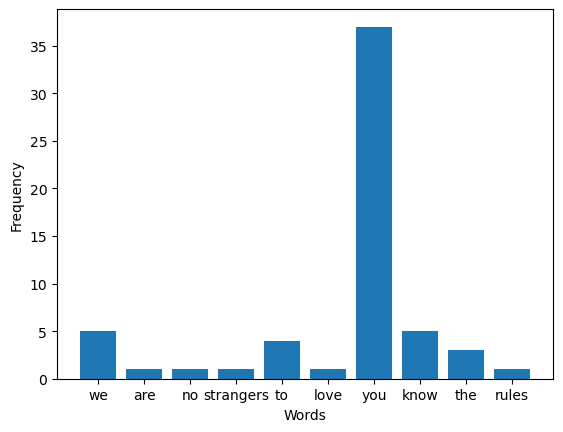

In [8]:
plt.bar(list(fdist.keys())[0:10],list(fdist.values())[0:10])
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

### Unigram model

An unigram model is a simple type of language model that considers each word in a sequence independently, without taking into account the previous words. In other words, it models the probability of each word occurring in the text, regardless of what came before it. Unigram models can be seen as a special case of n-gram models, where n is 1.


You can think that text follows patterns, and probabilities are used to measure how likely a sequence of words is. In a unigram model, each word is considered independent and doesn't rely on others. Let's calculate the probability of **'I like tiramisu but I love cheesecake more'**.

$  P(\text{"I"}) = \frac{\text{Count}(\text{"I"})}{\text{Total words}}=\frac{2}{8} = 0.250  $

$  P(\text{"like"}) = \frac{\text{Count}(\text{"like"})}{\text{Total words}}=\frac{1}{8} = 0.125  $

$  P(\text{"tiramisu"}) = \frac{\text{Count}(\text{"tiramisu"})}{\text{Total words}}=\frac{1}{8} = 0.125  $

$  P(\text{"but"}) = \frac{\text{Count}(\text{"but"})}{\text{Total words}}=\frac{1}{8} = 0.125  $

$  P(\text{"I"}) = \frac{\text{Count}(\text{"I"})}{\text{Total words}}=\frac{2}{8} = 0.250  $

$  P(\text{"love"}) = \frac{\text{Count}(\text{"love"})}{\text{Total words}}=\frac{1}{8} = 0.125  $

$  P(\text{"cheesecake"}) = \frac{\text{Count}(\text{"cheesecake"})}{\text{Total words}}=\frac{1}{8} = 0.125  $

$  P(\text{"more"}) = \frac{\text{Count}(\text{"more"})}{\text{Total words}}=\frac{1}{8} = 0.125  $

$P(\text{"I"}, \text{"like"}, \text{"tiramisu"}, \text{"but"}, \text{"I"}, \text{"love"}, \text{"cheesecake"}, \text{"more"}) = P(\text{"I"}) \cdot P(\text{"like"}) \cdot P(\text{"tiramisu"}) \cdot P(\text{"but"}) \cdot P(\text{"I"}) \cdot P(\text{"love"}) \cdot P(\text{"cheesecake"}) \cdot P(\text{"more"}) = 0.250 \times 0.125 \times 0.125 \times 0.125 \times 0.250 \times 0.125 \times 0.125 \times 0.125$

In general, language models boil down to predicting a sequence of length $t$: $P(W_t, W_{t-1}, ..., W_0)$. In this eight-word sequence, you have:

$P(W_7=\text{"more"}, W_6=\text{"cheesecake"}, W_5=\text{"love"}, W_4=\text{"I"}, W_3=\text{"but"}, W_2=\text{"tiramisu"}, W_1=\text{"like"}, W_0=\text{"I"})$

The subscript serves as a positional indicator in the sequence and does not impact the nature of $P(\bullet)$. When formally expressing the sequence, the last word is positioned at the leftmost side, gradually descending as you move through the sequence.


Using NLTK you can normalize the frequency values by dividing them by the total count of each word to get a probability function. Now you will find the probability of each word.


In [9]:
#total count of each word 
C=sum(fdist.values())
C

385

Find the probability of the word wish  i.w $P(strangers)$.


In [10]:
fdist['strangers']/C

0.0025974025974025974

Also, find each individual word by converting the tokens to a set.


In [11]:
vocabulary=set(tokens)

#### How unigram model predicts the next likely word

Let's consider a scenario from the above example **'I like tiramisu but I love cheesecake more'** where the unigram model is asked to predict the next word following the sequence **'I like'**.

If the highest probability among all words is **"I"** with a probability  0.25, then according to the model, the most likely next word after **'I like'** would be **'I'**. However, this prediction doesn't make sense at all. This highlights a significant limitation of the unigram model—it lacks context, and its predictions are entirely dependent on the word with the highest probability "I" in this case 

Even if multiple words have the same highest probabilities, it will randomly choose any one word out of all the options.


### Bigram model

Bigrams represent pairs of consecutive words in the given phrase, i.e., $(w_{t-1},w_t)$. Consider the following words from your example: "I like dogs and I kinda like cats."

The correct sequence of bigrams is:

$(I, like)$

$(like, dogs)$

$(dogs, and)$

$(and, I)$

$(I, kinda)$

$(kinda, like)$

$(like, cats)$


**2-Gram models**: Bigram models use conditional probability. The probability of a word depends only on the previous word, i.e., the conditional probability $(W_{t}, W_{t-1})$ is used to predict the likelihood of word $(W_t)$ following word $W_{t-1}$ in a sequence. You can calculate the conditional probability for a bigram model using the following steps.


Perform the bigram word count for each bigram: $Count(W_{t-1}, W_{t})$

$Count(\text{I, like}) = 1$

$Count(\text{like, dogs}) = 1$

$Count(\text{dogs, and}) = 1$

$Count(\text{and, I}) = 1$

$Count(\text{I, kinda}) = 1$

$Count(\text{kinda, like}) = 1$

$Count(\text{like, cats}) = 1$


Now, let's calculate the conditional probability for each bigram in the form of $P(w_{t} | w_{t-1})$, where $w_{t-1}$ is the **context**, and the context size is one.

$P(\text{"like"} | \text{"I"}) = \frac{\text{Count}(\text{"I, like"})}{\text{Total count of "I"}} = \frac{1}{2} = 0.5$

$P(\text{"dogs"} | \text{"like"}) = \frac{\text{Count}(\text{"like, dogs"})}{\text{Total count of "like"}} = \frac{1}{2} = 0.5$

$:$

$P(\text{"like"} | \text{"kinda"}) = \frac{\text{Count}(\text{"kinda, like"})}{\text{Total count of "kinda"}} = \frac{1}{1} = 1$

$P(\text{"cats"} | \text{"like"}) = \frac{\text{Count}(\text{"like, cats"})}{\text{Total count of "like"}} = \frac{1}{2} = 0.5$

These probabilities represent the likelihood of encountering the second word in a bigram, given the presence of the first word.


This approach is, in fact, an approximation used to determine the most likely word $W_t$, given the words $W_{t-1}, W_{t-2}, \ldots, W_1$ in the sequence.

$P(W_t | W_{t-1}, W_{t-2}, \ldots, W_1) \approx P(W_t | W_{t-1})$

The conditional probability $P(W_t | W_{t-1})$ signifies the likelihood of encountering the word $W_t$, based on the context provided by the preceding word $W_{t-1}$. By employing this approximation, simplify the modeling process by assuming that the occurrence of the current word is mainly influenced by the most recent word in the sequence. In general, you have the capability to identify the most likely word.

$\hat{W_t} = \arg\max_{W_t} \left( P(W_t | W_{t-1}) \right)$


```bigrams``` is a function provided by the Natural Language Toolkit (NLTK) library in Python. This function takes a sequence of tokens as input and returns an iterator over consecutive pairs of tokens, forming bigrams.


In [12]:
bigrams = nltk.bigrams(tokens)
bigrams

<generator object bigrams at 0x7fb45af12ad0>

Convert a generator into a list, where each element of the list is a bigram.


In [13]:
my_bigrams=list(nltk.bigrams(tokens))

You can see the first 10 bigrams.


In [14]:
my_bigrams[0:10]

[('we', 'are'),
 ('are', 'no'),
 ('no', 'strangers'),
 ('strangers', 'to'),
 ('to', 'love'),
 ('love', 'you'),
 ('you', 'know'),
 ('know', 'the'),
 ('the', 'rules'),
 ('rules', 'and')]

Compute the frequency distribution of the bigram $C(w_{t},w_{t-1})$ using the NLTK function```bigrams```.


In [15]:
freq_bigrams  = nltk.FreqDist(nltk.bigrams(tokens))
freq_bigrams

FreqDist({('gon', 'na'): 38, ('never', 'gon'): 36, ('you', 'never'): 9, ('na', 'tell'): 8, ('make', 'you'): 8, ('na', 'give'): 6, ('give', 'you'): 6, ('you', 'up'): 6, ('up', 'never'): 6, ('na', 'let'): 6, ...})

The result is akin to a dictionary, where the key is a tuple containing the bigram.


In [16]:
freq_bigrams[('we', 'are')]

1

It is possible to provide you with the first 10 values of the frequency distribution.


In [17]:
for my_bigram in  my_bigrams[0:10]:
    print(my_bigram)
    print(freq_bigrams[my_bigram])

('we', 'are')
1
('are', 'no')
1
('no', 'strangers')
1
('strangers', 'to')
1
('to', 'love')
1
('love', 'you')
1
('you', 'know')
1
('know', 'the')
3
('the', 'rules')
1
('rules', 'and')
1


Here, you can generate the conditional distribution by normalizing the frequency distribution of unigrams. In this case, you are doing it for the word 'strangers' and then sorting the results:


In [18]:
word="strangers"
vocab_probabilities={}
for next_word in vocabulary:
    vocab_probabilities[next_word]=freq_bigrams[(word,next_word)]/fdist[word]

vocab_probabilities=sorted(vocab_probabilities.items(), key=lambda x:x[1],reverse=True)

Print out the words that are more likely to occur.


In [19]:
vocab_probabilities[0:4]

[('to', 1.0), ('we', 0.0), ('how', 0.0), ('for', 0.0)]

Create a function to calculate the conditional probability of $W_t$ given $W_{t-1}$, sort the results, and output them as a list.


In [20]:
def make_predictions(my_words, freq_grams, normlize=1, vocabulary=vocabulary):
    """
    Generate predictions for the conditional probability of the next word given a sequence.

    Args:
        my_words (list): A list of words in the input sequence.
        freq_grams (dict): A dictionary containing frequency of n-grams.
        normlize (int): A normalization factor for calculating probabilities.
        vocabulary (list): A list of words in the vocabulary.

    Returns:
        list: A list of predicted words along with their probabilities, sorted in descending order.
    """

    vocab_probabilities = {}  # Initialize a dictionary to store predicted word probabilities

    context_size = len(list(freq_grams.keys())[0])  # Determine the context size from n-grams keys

    # Preprocess input words and take only the relevant context words
    my_tokens = preprocess(my_words)[0:context_size - 1]

    # Calculate probabilities for each word in the vocabulary given the context
    for next_word in vocabulary:
        temp = my_tokens.copy()
        temp.append(next_word)  # Add the next word to the context

        # Calculate the conditional probability using the frequency information
        if normlize!=0:
            vocab_probabilities[next_word] = freq_grams[tuple(temp)] / normlize
        else:
            vocab_probabilities[next_word] = freq_grams[tuple(temp)] 
    # Sort the predicted words based on their probabilities in descending order
    vocab_probabilities = sorted(vocab_probabilities.items(), key=lambda x: x[1], reverse=True)

    return vocab_probabilities  # Return the sorted list of predicted words and their probabilities

Set $W_{t-1}$ to 'i' and then calculate all the values of $P(W_t | W_{t-1}=i)$.


In [21]:
my_words="are"

vocab_probabilities=make_predictions(my_words,freq_bigrams,normlize=fdist['i'])

In [22]:
vocab_probabilities[0:10]

[('no', 0.3333333333333333),
 ('we', 0.0),
 ('how', 0.0),
 ('for', 0.0),
 ('ta', 0.0),
 ('both', 0.0),
 ('so', 0.0),
 ('hurt', 0.0),
 ('any', 0.0),
 ('you', 0.0)]

The word with the highest probability, denoted as $\hat{W}_t$, is given by the first element of the list, this can be used as a simple autocomplete:


In [23]:
vocab_probabilities[0][0]

'no'

Generate a sequence using the bigram model by leveraging the preceding word (t-1) to predict and generate the subsequent word in the sequence.


In [24]:
my_song=""
for w in tokens[0:100]:
  my_word=make_predictions(w,freq_bigrams)[0][0]
  my_song+=" "+my_word

In [25]:
 my_song

' both no strangers to say you never the game and hurt long i just lie commitments what im feeling of you never get this from any other for i just wan na tell a never im feeling got ta make you never never gon na tell you never never gon na tell you never never gon na tell around and hurt you never gon na tell you never never gon na tell goodbye never gon na tell a lie and hurt you never known each other for so long your hearts been aching but youre too shy to say goodbye'

Create a sequence using the n-gram model by initiating the process with the first word in the sequence and producing an initial output. Subsequently, utilize this output as the basis for generating the next word in the sequence, i.e., you will give your model a word, then use the output to predict the next word and repeat.


In [26]:
my_song="i"

for i in range(100):
    my_word=make_predictions(my_word,freq_bigrams)[0][0]
    my_song+=" "+my_word

In [27]:
my_song

'i never gon na tell a lie and hurt you never gon na tell a lie and hurt you never gon na tell a lie and hurt you never gon na tell a lie and hurt you never gon na tell a lie and hurt you never gon na tell a lie and hurt you never gon na tell a lie and hurt you never gon na tell a lie and hurt you never gon na tell a lie and hurt you never gon na tell a lie and hurt you never gon na tell a lie and hurt you never'

This method may not yield optimal results; consider the following:

$\hat{W_1}=\arg\max{W_1} \left( P(W_1 | W_{0}=\text{like})\right)$.

Upon evaluation, observe that the result for $\hat{W}_1$ includes both "dogs" and "cats" with equal likelihood.


## Trigram model
For the given example sentence: 'I like dogs and I kinda like cats'

$ (I, like, dogs) $

$(like, dogs, and) $

$(dogs, and, I)$

$(and, I, kinda)$

$(I, kinda, like)$

$(kinda, like, cats)$

Trigram models incorporate conditional probability as well. The probability of a word depends on the two preceding words. The conditional probability $P(W_t | W_{t-2}, W_{t-1})$ is utilized to predict the likelihood of word $W_t$ following the two previous words in a sequence. The context is $W_{t-2}, W_{t-1}$ and is of length 2. Let's compute the conditional probability for each trigram:

Calculate the trigram frequencies for each trigram: $Count(W_{t-2}, W_{t-1}, W_t)$

### Trigram frequency counts

$ \text{Count(I, like, dogs)} = 1 $

$ \text{Count(like, dogs, and)} = 1 $

$\text{Count(dogs, and, I)} = 1$

$ \text{Count(and, I, kinda)} = 1$

$ \text{Count(I, kinda, like)} = 1 $

$ \text{Count(kinda, like, cats)} = 1 $

The conditional probability $ P(w_{t} | w_{t-1}, w_{t-2})$ where $w_{t-1}$ and $w_{t-2}$ form the context, and the context size is 2.

To better understand how this outperforms the bigram model, let's compute the conditional probabilities with the context "I like":

$\hat{W_2}=\arg\max{W_2} \left( P(W_2 | W_{1}=like,W_{0}=I)\right)$

and for the words "cats" and "dogs":

$ P("dogs" | "like", "I") = \frac{Count(I, like, dogs)}{Total \ count \ of \ "I", "like"} = \frac{1}{1} = 1 $

$ P("cats" | "like", "I") = \frac{Count(I, like, cats)}{Total \ count \ of \ "I", "like"} = 0$

These probabilities signify the likelihood of encountering the third word in a trigram. Notably, the result $\hat{W}_2$ is "dogs," which seems to align better with the sequence.

The trigrams function is provided by the Natural Language Toolkit (NLTK) library in Python. This function takes a sequence of tokens as input, returns an iterator over consecutive token triplets, generating trigrams, and converts them into a frequency distribution.


In [28]:
freq_trigrams  = nltk.FreqDist(nltk.trigrams(tokens))
freq_trigrams

FreqDist({('never', 'gon', 'na'): 36, ('you', 'never', 'gon'): 9, ('gon', 'na', 'give'): 6, ('na', 'give', 'you'): 6, ('give', 'you', 'up'): 6, ('you', 'up', 'never'): 6, ('up', 'never', 'gon'): 6, ('gon', 'na', 'let'): 6, ('na', 'let', 'you'): 6, ('let', 'you', 'down'): 6, ...})

Find the probability for each of the next words.


In [29]:
make_predictions("so do",freq_trigrams,normlize=freq_bigrams[('do','i')] )[0:10]

[('i', 1.0),
 ('we', 0.0),
 ('how', 0.0),
 ('for', 0.0),
 ('ta', 0.0),
 ('both', 0.0),
 ('so', 0.0),
 ('hurt', 0.0),
 ('any', 0.0),
 ('you', 0.0)]

Find the probability for each of the next words.


In [30]:
my_song=""

w1=tokens[0]
for w2 in tokens[0:100]:
    gram=w1+' '+w2
    my_word=make_predictions(gram,freq_trigrams )[0][0]
    my_song+=" "+my_word
    w1=w2

In [31]:
my_song

' we no strangers to love you know the game and so do i a full commitments what im thinking of you wouldnt get this from any other guy i just wan na tell a how im feeling got ta make you cry never gon na make you up never gon na make you down never gon na make around and desert you never gon na make you cry never gon na make goodbye never gon na make a lie and hurt you never known each other for so long your hearts been aching but youre too shy to say it'

There are various challenges associated with Histogram-Based Methods, some of which are quite straightforward. For instance, when considering the case of having N words in your vocabulary, a Unigram model would entail $N$ bins, while a Bigram model would result in $N^2$ bins and so forth.

N-gram models also encounter limitations in terms of contextual understanding and their ability to capture intricate word relationships. For instance, let's consider the phrases `I hate dogs`, `I don’t like dogs`, and **don’t like** means **dislike**. Within this context, a histogram-based approach would fail to grasp the significance of the phrase **don’t like** means **dislike**, thereby missing out on the essential semantic relationship it encapsulates.


## Feedforward Neural Networks (FNNs) for language models

FNNs, or Multi-Layer Perceptrons, serve as the foundational components for comprehending neural networks in natural language processing (NLP). In NLP tasks, FNNs process textual data by transforming it into numerical vectors known as embeddings. Subsequently, these embeddings are input to the network to predict language facets, such as the upcoming word in a sentence or the sentiment of a text.


In [32]:
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

 ### Tokenization for FNN


 This PyTorch function is used to obtain a tokenizer for text.


In [33]:
tokenizer = get_tokenizer("basic_english")
tokens=tokenizer(song)

### Indexing

TorchText provides tools to tokenize text into individual words (tokens) and build a vocabulary, which maps tokens to unique integer indexes. This is a crucial step in preparing text data for  machine learning models that require numerical input.


In [34]:
# Create a vocabulary from text tokens

# tokenize the 'song' text using the provided tokenizer.
# The map function applies the tokenizer to each word in the 'song' after splitting it.
# The result is a list of tokens representing the words in the 'song'.
tokenized_song = map(tokenizer, song.split())

# Step 2: Vocabulary Building
# The build_vocab_from_iterator function constructs a vocabulary from the tokenized text.
# In this case, add a special token "<unk>" (unknown token) to handle out-of-vocabulary words.
vocab = build_vocab_from_iterator(tokenized_song, specials=["<unk>"])

# Step 3: Set Default Index
# Set the default index for the vocabulary to the index corresponding to the "<unk>" token.
# This ensures that any unknown tokens in the future will be mapped to this index.
vocab.set_default_index(vocab["<unk>"])

Convert the tokens to indices by applying the function as shown here:


In [35]:
vocab(tokens[0:10])

[21, 58, 70, 74, 25, 69, 2, 20, 31, 72]

Write a text function that converts raw text into indexes.


In [36]:
text_pipeline = lambda x: vocab(tokenizer(x))
text_pipeline(song)[0:10]

[21, 58, 70, 74, 25, 69, 2, 20, 31, 72]

Find the word corresponding to an index using the```get_itos()```method. The result is a list where the index of the list corresponds to a word.


In [37]:
index_to_token = vocab.get_itos()
index_to_token[0]

'<unk>'

## Embedding layers

An embedding layer is a crucial element in natural language processing (NLP) and neural networks designed for sequential data. It serves to convert categorical variables, like words or discrete indexes representing tokens, into continuous vectors. This transformation facilitates training and enables the network to learn meaningful relationships among words.

Let's consider a simple example involving a vocabulary of words 
- **Vocabulary**: {apple, banana, orange, pear}

Each word in your vocabulary has a unique index assigned to it: 
- **Indices**: {0, 1, 2, 3}

When using an embedding layer, you will initialize random continuous vectors for each index. For instance, the embedding vectors might look like:

- Vector for index 0 (apple): [0.2, 0.8]
- Vector for index 1 (banana): [0.6, -0.5]
- Vector for index 2 (orange): [-0.3, 0.7]
- Vector for index 3 (pear): [0.1, 0.4]
In PyTorch, you can create an embedding layer.


In [38]:
embedding_dim=20
vocab_size=len(vocab)
embeddings = nn.Embedding(vocab_size, embedding_dim)

**Embeddings**: Obtain the embedding for the first word with index 0 or 1. Don't forget that you have to convert the input into a tensor. The embeddings are initially initialized randomly, but as the model undergoes training, words with similar meanings gradually come to cluster closer together


In [39]:
for n in range(2): 
    embedding=embeddings(torch.tensor(n))
    print("word",index_to_token[n])
    print("index",n)
    print( "embedding", embedding)
    print("embedding shape", embedding.shape)

word <unk>
index 0
embedding tensor([-0.3962,  0.8001,  0.3807,  0.2055,  0.5804, -0.8076, -0.1734,  0.9268,
        -0.1648, -0.3151,  0.4980,  1.8933,  0.1526, -2.0278, -1.1289, -1.7310,
        -0.9403, -0.8265,  0.8457, -1.4563], grad_fn=<EmbeddingBackward0>)
embedding shape torch.Size([20])
word gonna
index 1
embedding tensor([ 2.3409,  0.7695, -0.5587, -0.9254,  2.2008, -0.4513,  0.4618, -0.5581,
        -2.1085,  0.8065, -0.6466,  1.0990,  0.4191, -0.0670, -1.1939,  0.1098,
        -0.4464,  0.3211,  0.0842, -0.2403], grad_fn=<EmbeddingBackward0>)
embedding shape torch.Size([20])


These vectors will serve as inputs for the next layer.


### Generating context-target pairs (n-grams)

Organize words within a variable-size context using the following approach: Each word is denoted by 'i'. 
To establish the context, simply subtract 'j'. The size of the context is determined by the value of``CONTEXT_SIZE``.


In [40]:
CONTEXT_SIZE=2

ngrams = [
    (
        [tokens[i - j - 1] for j in range(CONTEXT_SIZE)],
        tokens[i]
    )
    for i in range(CONTEXT_SIZE, len(tokens))
]

Output the first element, which results in a tuple. The initial element represents the context, and the index indicates the following word.


In [41]:
context, target=ngrams[0]
print("context",context,"target",target)
print("context index",vocab(context),"target index",vocab([target]))

context ['are', 'we'] target no
context index [58, 21] target index [70]


In this context, there are multiple words. Aggregate the embeddings of each of these words and then adjust the input size of the subsequent layer accordingly. Then, create the next layer.


In [42]:
linear = nn.Linear(embedding_dim*CONTEXT_SIZE,128)

You have the two embeddings.


In [43]:
my_embeddings=embeddings(torch.tensor(vocab(context)))
my_embeddings.shape

torch.Size([2, 20])

Reshape the embeddings.


In [44]:
my_embeddings=my_embeddings.reshape(1,-1)
my_embeddings.shape

torch.Size([1, 40])

They can now be used as inputs in the next layer.


In [45]:
linear(my_embeddings)

tensor([[ 2.6535e-01, -1.6329e-01, -5.6420e-01,  4.3258e-01, -6.0180e-01,
          1.2276e+00,  4.6947e-01, -6.2033e-01, -1.3687e+00,  4.7783e-01,
          1.4492e-01, -1.4477e-01,  3.8746e-01, -3.0654e-01,  1.4642e-01,
          7.7145e-01, -2.0148e-01, -4.9028e-01,  3.2441e-01,  8.7085e-03,
         -6.6041e-01, -1.3049e-01, -3.7528e-01, -2.2350e-01,  1.0244e-01,
         -3.1832e-01,  1.5384e-01,  4.4682e-01,  8.2856e-04,  3.9074e-01,
          2.5557e-01,  5.2923e-01, -4.3401e-02,  4.9410e-01, -3.4803e-01,
         -1.0834e+00, -5.0617e-01,  6.1745e-01, -3.7712e-03, -5.7048e-01,
         -6.9537e-02, -8.3598e-01, -1.8962e-01, -8.1172e-02, -1.4582e-01,
         -6.2329e-02,  1.6750e-01, -1.2481e+00,  4.8298e-01, -8.9021e-02,
         -5.1118e-01, -4.3207e-02,  3.7358e-01,  3.0695e-01, -3.1337e-01,
          2.0808e-02,  3.2537e-01, -4.6035e-01, -2.9892e-01,  3.3951e-02,
         -1.2434e-01, -1.0741e+00, -4.7657e-02,  8.9945e-01, -2.9755e-01,
          5.0733e-01, -6.6309e-03, -2.

## Batch function

Create a Batch function to interface with the data loader. Several adjustments are necessary to handle words that are part of a context in one batch and a predicted word in the following batch.


In [46]:
from torch.utils.data import DataLoader

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
CONTEXT_SIZE=3
BATCH_SIZE=10
EMBEDDING_DIM = 10

def collate_batch(batch):
    batch_size=len(batch)
    context, target=[],[]
    for i in range(CONTEXT_SIZE,batch_size):
        target.append(vocab([batch[i]]))
        context.append(vocab([batch[i-j-1] for j in range(CONTEXT_SIZE)]))

    return   torch.tensor(context).to(device),  torch.tensor(target).to(device).reshape(-1)

Similarly, it's important to highlight that the size of the last batch could deviate from that of the earlier batches. To tackle this, the approach involves adjusting the final batch to conform to the specified batch size, ensuring it becomes a multiple of the predetermined size. When necessary, you'll employ padding techniques to achieve this harmonization. One approach you'll use is appending the beginning of the song to the end of the batch.


In [47]:
Padding=BATCH_SIZE-len(tokens)%BATCH_SIZE
tokens_pad=tokens+tokens[0:Padding]


Create the`DataLoader`.


In [48]:
dataloader = DataLoader(
     tokens_pad, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_batch
)

## Multi-class neural network

You have developed a PyTorch class for a multi-class neural network. The network's output is the probability of the next word within a given context. Therefore, the number of classes corresponds to the count of distinct words. The initial layer consists of embeddings, and in addition to the final layer, an extra hidden layer is incorporated.


In [49]:
class NGramLanguageModeler(nn.Module):

    def __init__(self, vocab_size, embedding_dim, context_size):
        super(NGramLanguageModeler, self).__init__()
        self.context_size=context_size
        self.embedding_dim=embedding_dim
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear1 = nn.Linear(context_size * embedding_dim, 128)
        self.linear2 = nn.Linear(128, vocab_size)

    def forward(self, inputs):
        embeds = self.embeddings(inputs)
        embeds=torch.reshape( embeds, (-1,self.context_size * self.embedding_dim))
        out = F.relu(self.linear1(embeds))
        out = self.linear2(out)

        return out

Create a model.


In [50]:
model = NGramLanguageModeler(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE).to(device)

Retrieve samples from the data loader object and input them into the neural network.


In [51]:
context, target=next(iter(dataloader))
out=model(context)

While the model remains untrained, analyzing the output can provide us with a clearer understanding. In the output, the first dimension corresponds to the batch size, while the second dimension represents the probability associated with each class.


In [52]:
out.shape

torch.Size([7, 79])

Find the index with the highest probability.


In [53]:
predicted_index =torch.argmax(out,1)
predicted_index

tensor([ 0, 26, 19, 29, 22, 27,  5])

Find the corresponding token.


In [54]:
[index_to_token[i.item()] for i in  predicted_index]

['<unk>', 'feeling', 'up', 'other', 'been', 'how', 'tell']

Create a function that accomplishes the same task for the tokens.


In [55]:
def write_song(model,number_of_words=100):
    my_song=""
    for i in range(number_of_words):
        with torch.no_grad():
            context=torch.tensor(vocab([tokens[i-j-1] for j in range(CONTEXT_SIZE)])).to(device)
            word_inx=torch.argmax(model(context))
            my_song+=" "+index_to_token[word_inx.detach().item()]

    return my_song

In [56]:
write_song(model)

' from how from <unk> feeling up other been how tell tell how blind hearts your your known feeling going your <unk> inside from blind from tell love make tell other tell love strangers tell from how tell blind <unk> do make and tell see tell rules blind down lie tell never get tell lie tell strangers know feeling wouldnt lie tell say hearts been tell lie tell strangers im how tell known your feeling blind from how tell tell lie rules never dont your other <unk> <unk> strangers what never blind from are me both tell make tell other tell'

## Training

Training a language model involves a multi-step process that leverages training and testing data to optimize model performance. In the realm of Natural Language Processing (NLP), this process often employs various metrics to gauge a model's accuracy, such as perplexity or accuracy on unseen data. However, in the context of your current exploration, you will embark on a slightly different journey. Instead of relying solely on conventional NLP metrics, the focus shifts to manual inspection of the results. 

You have the cross entropy loss between input logits and target:


In [57]:
criterion = torch.nn.CrossEntropyLoss()

You have developed a function dedicated to training the model using the supplied data loader. In addition to training the model, the function's output includes predictions for each epoch, spanning context for the next 100 words.


In [58]:
def train(dataloader, model, number_of_epochs=100, show=10):
    """
    Args:
        dataloader (DataLoader): DataLoader containing training data.
        model (nn.Module): Neural network model to be trained.
        number_of_epochs (int, optional): Number of epochs for training. Default is 100.
        show (int, optional): Interval for displaying progress. Default is 10.

    Returns:
        list: List containing loss values for each epoch.
    """

    MY_LOSS = []  # List to store loss values for each epoch

    # Iterate over the specified number of epochs
    for epoch in tqdm(range(number_of_epochs)):
        total_loss = 0  # Initialize total loss for the current epoch
        my_song = ""    # Initialize a string to store the generated song

        # Iterate over batches in the dataloader
        for context, target in dataloader:
            model.zero_grad()          # Zero the gradients to avoid accumulation
            predicted = model(context)  # Forward pass through the model to get predictions
            loss = criterion(predicted, target.reshape(-1))  # Calculate the loss
            total_loss += loss.item()   # Accumulate the loss

            loss.backward()    # Backpropagation to compute gradients
            optimizer.step()   # Update model parameters using the optimizer

        # Display progress and generate song at specified intervals
        if epoch % show == 0:
            my_song += write_song(model)  # Generate song using the model

            print("Generated Song:")
            print("\n")
            print(my_song)

        MY_LOSS.append(total_loss/len(dataloader))  # Append the total loss for the epoch to MY_LOSS list

    return MY_LOSS  # Return the list of  mean loss values for each epoch

The following list will be used to store the loss for each model.


In [59]:
my_loss_list=[]

This code segment initializes an n-gram language model with a context size of 2. The model, named `model_2`, is configured based on the provided vocabulary size, embedding dimension, and context size. The Stochastic Gradient Descent (SGD) optimizer is employed with a learning rate of 0.01 to manage model parameter updates. A learning rate scheduler, using a step-wise approach with a reduction factor of 0.1 per epoch, is set up to adapt the learning rate during the training process. These settings collectively establish the framework for training the n-gram language model with tailored optimization and learning rate adjustment.


In [60]:
# Define the context size for the n-gram model
CONTEXT_SIZE = 2

# Create an instance of the NGramLanguageModeler class with specified parameters
model_2 = NGramLanguageModeler(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE).to(device)

# Define the optimizer for training the model, using stochastic gradient descent (SGD)
optimizer = optim.SGD(model_2.parameters(), lr=0.01)

# Set up a learning rate scheduler using StepLR to adjust the learning rate during training
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1.0, gamma=0.1)

Now, you will train the model.


In [61]:
my_loss=train(dataloader,model_2)

  2%|▏         | 2/100 [00:00<00:14,  6.96it/s]

Generated Song:


 gonna you and and you gonna you gotta you never tell been you up tell never and <unk> never and you never and any im up you too and up tell and never and never hurt you you and see and strangers you never you never im and never you gonna you never never never aching been you and you never you and never gonna never you never gonna never you never im been you gonna <unk> gonna too any too a up see gonna rules you <unk> never a and you you never see dont never and im been


 12%|█▏        | 12/100 [00:01<00:13,  6.38it/s]

Generated Song:


 never never gonna gonna you gonna you never never gonna gonna you you gonna you gonna and gonna you gonna you never you never never never you you you never you gonna never you never gonna you you and you you never gonna tell you you never gonna tell you never gonna gonna tell you and desert you never gonna tell you you never gonna tell you never gonna tell you gonna and gonna you never never gonna you you gonna you never you gonna you you gonna never gonna gonna gonna gonna you never gonna never you never never


 22%|██▏       | 22/100 [00:03<00:13,  5.57it/s]

Generated Song:


 never never never never you gonna you never never never never you you and you never and you you and you never never never never never you never you never and gonna tell you never never you you and you you never gonna tell you up never gonna tell you down never gonna tell around and desert you never gonna tell you you never gonna tell you never gonna tell you gonna and hurt you never never gonna you you gonna you never you gonna you you gonna never and gonna gonna gonna never never gonna never you never never


 32%|███▏      | 32/100 [00:05<00:12,  5.62it/s]

Generated Song:


 never never never never never gonna you up never never and desert you and you never and goodbye you and you never never never and and you never you never and gonna tell you up never you you and you cry never gonna tell you up never gonna tell you down never gonna tell around and desert you never gonna tell you cry never gonna tell you never gonna tell you lie and hurt you never never gonna you for gonna a never you been make you gonna too and gonna you gonna never we both never you never never


 42%|████▏     | 42/100 [00:07<00:09,  5.89it/s]

Generated Song:


 never never no strangers never gonna you up never game im desert you and you never and goodbye you and you never around never and and down never you never and gonna tell you down never you you make you cry never gonna tell you up never gonna tell you down never gonna tell around and desert you never gonna tell you cry never gonna tell goodbye never gonna tell you lie and hurt you never never gonna other for gonna a never you been aching you gonna too and to you gonna inside we both never whats been never


 52%|█████▏    | 52/100 [00:08<00:08,  5.79it/s]

Generated Song:


 never never no strangers never love you up never game im desert you and you never and goodbye im and you never cry never and and down other you never and gonna tell you down im feeling gotta make you cry never gonna tell you up never gonna tell you down never gonna tell around and desert you never gonna tell you cry never gonna tell goodbye never gonna tell a lie and hurt you never never each other for gonna a know you been aching you youre too shy to you gonna inside we both know whats been going


 62%|██████▏   | 62/100 [00:10<00:06,  6.03it/s]

Generated Song:


 never never no strangers to love you up the game im desert you i for know and we im and you never cry never and and down other for i and know tell you how im feeling gotta make you cry never gonna tell you up never gonna tell you down never gonna tell around and desert you never gonna tell you cry never gonna tell goodbye never gonna tell a lie and hurt you never never each other for gonna a know hearts been aching but youre too shy to you goodbye inside we both know whats been going


 72%|███████▏  | 72/100 [00:11<00:03,  7.19it/s]

Generated Song:


 never never no strangers to love you up the game im were you i for know and we im thinking you never cry never and and down other guy i and know tell you how im feeling gotta make you cry never gonna tell you up never gonna tell you down never gonna tell around and desert you never gonna tell you cry never gonna tell goodbye never gonna tell a lie and hurt you never never each other for gonna a i hearts been aching but youre too shy to you goodbye inside we both know whats been going


 82%|████████▏ | 82/100 [00:13<00:03,  5.88it/s]

Generated Song:


 never never no strangers to love you up the game im were you i other know and we im thinking you never cry never and and any other guy i and know tell you how im feeling gotta make you cry never gonna tell you up never gonna tell you down never gonna tell around and desert you never gonna tell you cry never gonna tell goodbye never gonna tell a lie and hurt you never known each other for so a i hearts been aching but youre too shy to love it inside we both know whats been going


 92%|█████████▏| 92/100 [00:15<00:01,  6.20it/s]

Generated Song:


 never never no strangers to love you up the game im were you i a full and what im thinking you never cry never and and any other guy i and know tell you how im feeling gotta make you cry never gonna tell you up never gonna tell you down never gonna tell around and desert you never gonna tell you cry never gonna tell goodbye never gonna tell a lie and hurt you never known each other for so a your hearts been aching but youre too shy to love it inside we both know whats been going


100%|██████████| 100/100 [00:16<00:00,  5.98it/s]


Save the model.


In [62]:
save_path = '2gram.pth'
torch.save(model_2.state_dict(), save_path)
my_loss_list.append(my_loss)

The code provided below shows word embeddings from the created model, reduces their dimensionality to 2D using t-SNE, and then plots them as a scatter plot. Additionally, it annotates the first 20 points in the visualization with their corresponding words. This is used to visualize how similar words cluster together in a lower-dimensional space, revealing the structure of the word embeddings. Embeddings allow the model to represent words in a continuous vector space, capturing semantic relationships and similarities between words.


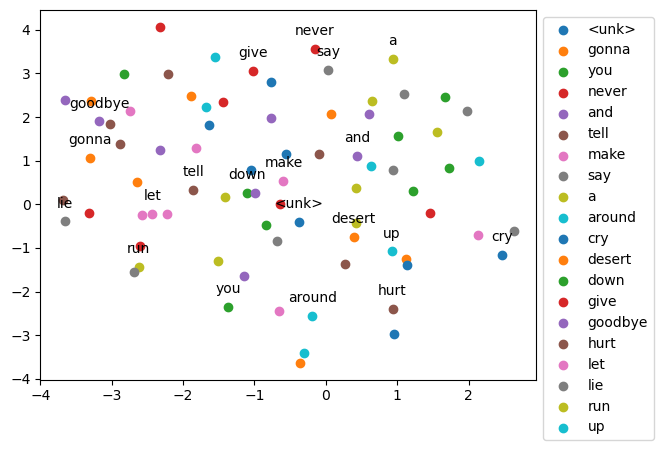

In [63]:
X = model_2.embeddings.weight.cpu().detach().numpy()
tsne = TSNE(n_components=2, random_state=42)
X_2d = tsne.fit_transform(X)

labels = []

for j in range(len(X_2d)):
    if j < 20:
        plt.scatter(X_2d[j, 0], X_2d[j, 1], label=index_to_token[j])
        labels.append(index_to_token[j])
        # Add words as annotations
        plt.annotate(index_to_token[j],
                     (X_2d[j, 0], X_2d[j, 1]),
                     textcoords="offset points",
                     xytext=(0, 10),
                     ha='center')
    else:
        plt.scatter(X_2d[j, 0], X_2d[j, 1])

plt.legend(labels, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Repeat the process for a context of four.


In [64]:
CONTEXT_SIZE=4
model_4 = NGramLanguageModeler(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE).to(device)
optimizer = optim.SGD(model_4.parameters(), lr=0.01)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.1)
my_loss=train(dataloader,model_4 )

save_path = '4gram.pth'
torch.save(model_4.state_dict(), save_path)

my_loss_list.append(my_loss)

  2%|▏         | 2/100 [00:00<00:14,  6.71it/s]

Generated Song:


 say me gonna say of to of gonna im to to going full love im long a of im say play make feeling you im goodbye to for your long me gonna gonna im so gonna goodbye long make gonna and say say long you to so love wanna are to you gonna hearts so up never say never gonna love make to to long long you you love hearts understand you hearts your to say gonna gotta wanna say say gonna gonna to gonna the around each for a gonna play make and a of to desert long im


 12%|█▏        | 12/100 [00:01<00:14,  6.02it/s]

Generated Song:


 never gonna gonna gonna gonna you you never you gonna you you you gonna gonna gonna you gonna you you never gonna never gonna never gonna never you never gonna gonna never gonna never you never gonna never you you never gonna gonna you you never never gonna let you you never gonna make you and never you never gonna make you never never gonna say you never gonna tell you and never you you never gonna gonna never you never gonna gonna never gonna you you never you never gonna never gonna gonna you you you you never never


 22%|██▏       | 22/100 [00:03<00:12,  6.01it/s]

Generated Song:


 never never gonna you to you you never how gonna you you you you a gonna you and you you never gonna never gonna make you and you never you never never gonna tell how never gonna never make you never gonna gonna make you up never gonna let you down never gonna say around and desert you never gonna make you up never gonna say goodbye never gonna tell a lie never you you never gonna gonna never for never gonna gonna never gonna you but never you shy to never to you a both know you never never


 32%|███▏      | 32/100 [00:05<00:12,  5.66it/s]

Generated Song:


 never never gonna you to you you never how gonna you were you you a gonna you to make you never gonna never gonna make you and you im i you never gonna tell how im feeling gotta make you and gonna gonna say you up never gonna let you down never gonna say around and desert you never gonna make you up never gonna say goodbye never gonna tell a lie and hurt you never never each other for never and gonna never gonna aching but youre you shy to never to you a both know whats been going


 42%|████▏     | 42/100 [00:06<00:08,  7.06it/s]

Generated Song:


 never known gonna you to love you know how gonna you were you you a gonna you to make other im gonna never gonna make goodbye and you im i gotta never gonna tell how im feeling gotta make you and gonna gonna say you up never gonna let you down never gonna run around and desert you never gonna make you up never gonna say goodbye never gonna tell a lie and hurt you never known each other for never and gonna never gonna aching but youre too shy to never to you we both know whats been going


 52%|█████▏    | 52/100 [00:08<00:06,  6.89it/s]

Generated Song:


 never known gonna strangers to love you know how rules you were you you a full you what im other im gonna know gonna this from and other im i gotta never gonna tell how im feeling gotta make you up gonna gonna say you up never gonna let you down never gonna run around and desert you never gonna make you up never gonna say goodbye never gonna tell a lie and hurt you never known each other for never and gonna never gonna aching but youre too shy to never to you we both know whats been going


 62%|██████▏   | 62/100 [00:10<00:08,  4.66it/s]

Generated Song:


 never are no strangers to love you know the rules you were you you a full commitments what im thinking im gonna know gonna this from any other im i gotta never gonna and how im feeling gotta make you up gonna gonna say you up never gonna let you down never gonna run around and desert you never gonna make you cry never gonna say goodbye never gonna tell a lie and hurt you never known each other for so and gonna never been aching but youre too shy to see to you we both know whats been going


 72%|███████▏  | 72/100 [00:12<00:05,  5.19it/s]

Generated Song:


 never are no strangers to love you know the rules and were you you a full commitments what im thinking im gonna know gonna this from any other guy i gotta never gonna and how im feeling gotta make you up gonna gonna say you up never gonna let you down never gonna run around and desert you never gonna make you cry never gonna say goodbye never gonna tell a lie and hurt you never known each other for so and gonna never been aching but youre too shy to see to you we both know whats been going


 82%|████████▏ | 82/100 [00:14<00:03,  5.61it/s]

Generated Song:


 never are no strangers to love you know the rules and were you you a full commitments what im thinking im gonna know gonna this from any other guy i gotta never gonna and how im feeling gotta make you up gonna gonna say you up never gonna let you down never gonna run around and desert you never gonna make you cry never gonna say goodbye never gonna tell a lie and hurt you never known each other for so and gonna never been aching but youre too shy to see never you we both know whats been going


 92%|█████████▏| 92/100 [00:15<00:01,  6.94it/s]

Generated Song:


 never are no strangers to love you know the rules and were you you a full commitments what im thinking im gonna know gonna this from any other guy i gotta never gonna and how im feeling gotta make you up gonna gonna say you up never gonna let you down never gonna run around and desert you never gonna make you cry never gonna say goodbye never gonna tell a lie and hurt you never known each other for so and gonna never been aching but youre too shy to see never you we both know whats been going


100%|██████████| 100/100 [00:16<00:00,  5.90it/s]


The code provided below shows word embeddings from the created model, reduces their dimensionality to 2d using t-SNE, and then plots them as a scatter plot. Additionally, it annotates the first 20 points in the visualization with their corresponding words. This is used to visualize how similar words cluster together in a lower-dimensional space, revealing the structure of the word embeddings. Embeddings allow the model to represent words in a continuous vector space, capturing semantic relationships and similarities between words.


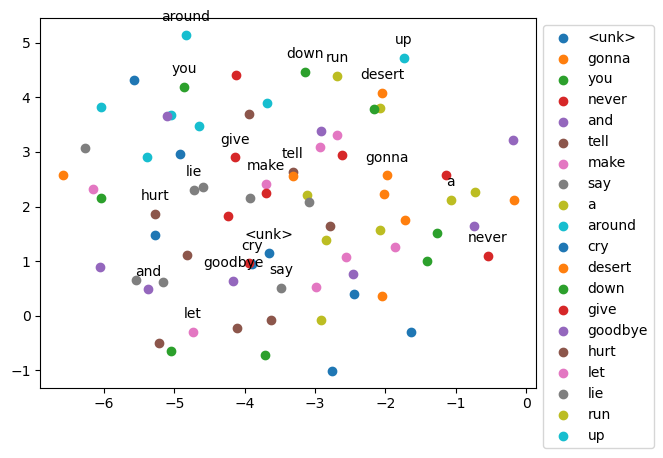

In [65]:
X = model_4.embeddings.weight.cpu().detach().numpy()
tsne = TSNE(n_components=2, random_state=42)
X_2d = tsne.fit_transform(X)

labels = []

for j in range(len(X_2d)):
    if j < 20:
        plt.scatter(X_2d[j, 0], X_2d[j, 1], label=index_to_token[j])
        labels.append(index_to_token[j])
        # Add words as annotations
        plt.annotate(index_to_token[j],
                     (X_2d[j, 0], X_2d[j, 1]),
                     textcoords="offset points",
                     xytext=(0, 10),
                     ha='center')
    else:
        plt.scatter(X_2d[j, 0], X_2d[j, 1])

plt.legend(labels, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Finally, for a context of eight.


In [66]:
CONTEXT_SIZE=8
model_8 = NGramLanguageModeler(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE).to(device)
optimizer = optim.SGD(model_8.parameters(), lr=0.01)

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.1)
my_loss=train(dataloader,model_8)

save_path = '8gram.pth'
torch.save(model_8.state_dict(), save_path)

my_loss_list.append(my_loss)

  2%|▏         | 2/100 [00:00<00:12,  8.00it/s]

Generated Song:


 each gonna this you you gonna never you going hurt rules you you gonna never make aching rules never up you you you gonna what hurt you run you gonna you gotta make it you gonna never gonna going im lie gonna you never you never gonna never never you never gonna never never you feeling never never never never never you never gonna never never you known gonna never you known gotta let never each gonna never you you gonna never aching you never you on never never never you you gonna both on you each both never any


 12%|█▏        | 12/100 [00:01<00:13,  6.45it/s]

Generated Song:


 never gonna make you for you you you the rules going you you gonna you make you never never never make you you gonna tell let you never never i you gonna make you you gonna make gonna make you never gonna going let you down gonna gonna let you down never gonna let around down never gonna never gonna make you you never gonna let you down gonna tell a gonna gonna hurt you never gonna make you for so make it you never gonna shy gonna too shy you you you make you you you you been going


 22%|██▏       | 22/100 [00:03<00:11,  6.78it/s]

Generated Song:


 never gonna make other for love you i the rules going i you tell you make you for im thinking too i you never tell let you never guy i make gonna make you you gonna shy gonna make you never gonna going say you down gonna gonna let you down never gonna run around and never gonna never gonna make you up never gonna say you down gonna tell a lie gonna hurt you never gonna make other for so going i you never gonna shy gonna too shy to you you too give you too you been going


 32%|███▏      | 32/100 [00:04<00:11,  5.72it/s]

Generated Song:


 never gonna make other for love you i the rules going hurt gonna tell you make you hurt im thinking too i you never tell let you never guy i make gonna make you you gonna shy gonna make you never gonna going say you down gonna gonna let you down never gonna run around and never gonna never gonna make you up never gonna say you down gonna tell a lie too hurt you never gonna make other for so going i you never gonna shy gonna too shy to you you too give you too you been going


 42%|████▏     | 42/100 [00:06<00:10,  5.79it/s]

Generated Song:


 never gonna make other for love you i the rules going hurt other tell you make you hurt im thinking too i you never tell let you never guy i make gonna make you you gonna rules gonna make you never gonna going say you down gonna gonna let you down never gonna run around and never gonna never gonna make you up never gonna say you down gonna tell a lie too hurt you never gonna make other for so going i you never gonna dont gonna too shy to you you too give you too you been going


 52%|█████▏    | 52/100 [00:07<00:06,  6.88it/s]

Generated Song:


 never gonna on other for love you i the rules going hurt other tell you make you hurt im thinking too i you never tell let you never guy i make gonna make you you gonna rules gonna make you never gonna going say you down gonna gonna let you down never gonna run around and never gonna never gonna make you up never gonna say you down gonna tell a lie too hurt you never gonna make other for so going i you never gonna dont gonna too shy to you you too give you too you been going


 62%|██████▏   | 62/100 [00:09<00:05,  7.13it/s]

Generated Song:


 never gonna on other for love you i the rules going hurt other tell you make you hurt im thinking too i you never tell let you never guy i make gonna make you you gonna rules gonna make you never gonna going say you down gonna gonna let you down never gonna run around and never gonna never gonna make you up never gonna say you down gonna tell a lie too hurt you never gonna make other for so going i you never gonna dont gonna too shy to you you too give you too you been going


 72%|███████▏  | 72/100 [00:10<00:04,  6.17it/s]

Generated Song:


 never gonna on other for love you i the rules going hurt other tell you make you hurt im thinking too i you never tell let you never guy i make gonna make you you gonna rules gonna make you never gonna going say you down gonna gonna let you down never gonna run around and never gonna never gonna make you up never gonna say you down gonna tell a lie too hurt you never gonna make other for so going i you never gonna dont gonna too shy to you you too give you too you been going


 82%|████████▏ | 82/100 [00:12<00:02,  6.20it/s]

Generated Song:


 never gonna on other for love you i the rules going on other tell you make you hurt im thinking too i you never tell let you never guy i make gonna make you you gonna rules gonna make you never tell going say you down gonna gonna let you down never gonna run around and never gonna never gonna make you up never gonna say you down gonna tell a lie too hurt you never gonna make other for so going i you never gonna dont gonna too shy to you you too give you too you been going


 92%|█████████▏| 92/100 [00:14<00:01,  5.94it/s]

Generated Song:


 never gonna on other for love you i the rules going on other tell you make you hurt im thinking too i you never tell let you never guy i make gonna make you you gonna rules dont make you never tell going say you down gonna gonna let you down never gonna run around and never gonna never gonna make you up never gonna say you down gonna tell a lie too hurt you never gonna make other for so going i you never gonna dont gonna too shy to you you too give you too you been going


100%|██████████| 100/100 [00:15<00:00,  6.50it/s]


The code provided below shows word embeddings from the created model, reduces their dimensionality to 2D using t-SNE, and then plots them as a scatter plot. Additionally, it annotates the first 20 points in the visualization with their corresponding words. This is used to visualize how similar words cluster together in a lower-dimensional space, revealing the structure of the word embeddings. Embeddings allow the model to represent words in a continuous vector space, capturing semantic relationships and similarities between words.


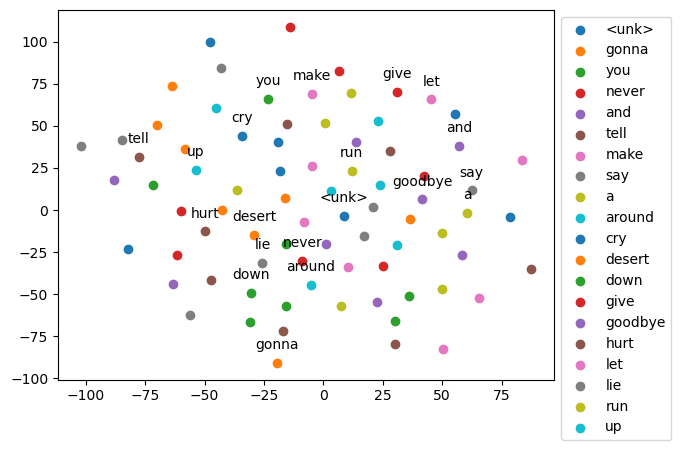

In [67]:
X = model_8.embeddings.weight.cpu().detach().numpy()
tsne = TSNE(n_components=2, random_state=42)
X_2d = tsne.fit_transform(X)

labels = []

for j in range(len(X_2d)):
    if j < 20:
        plt.scatter(X_2d[j, 0], X_2d[j, 1], label=index_to_token[j])
        labels.append(index_to_token[j])
        # Add words as annotations
        plt.annotate(index_to_token[j],
                     (X_2d[j, 0], X_2d[j, 1]),
                     textcoords="offset points",
                     xytext=(0, 10),
                     ha='center')
    else:
        plt.scatter(X_2d[j, 0], X_2d[j, 1])

plt.legend(labels, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

When considering the plotted loss for each model, a discernible trend emerges: an increase in context size correlates with a reduction in loss. While this specific approach lacks the inclusion of model validation or the utilization of conventional NLP evaluation metrics, the visual evidence substantiates its superior performance. 


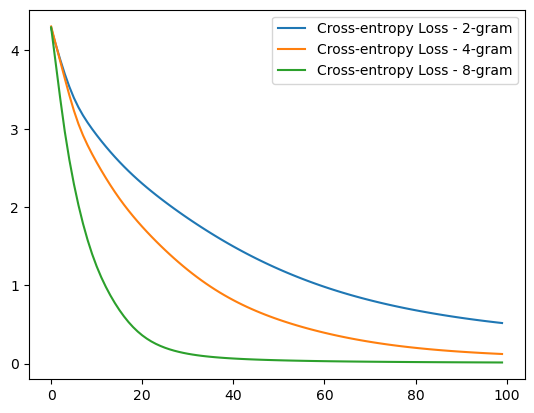

In [68]:
for (my_loss, model_name)in zip(my_loss_list,["2-gram","4-gram","8-gram"]):
    plt.plot(my_loss,label="Cross-entropy Loss - {}".format(model_name))
    plt.legend()

## Perplexity
Perplexity is a measurement used to evaluate the effectiveness of language models or probability models. It provides an indication of how well a model predicts a sample of data or the likelihood of an unseen event. Perplexity is commonly used in natural language processing tasks, such as machine translation, speech recognition, and language generation.

Perplexity is derived from the concept of cross-entropy loss, which measures the dissimilarity between predicted probabilities and actual probabilities. 

$$\text{Cross-Entropy Loss} = -\sum_{i=1}^{N} y_i \ln(p_i)$$
The cross-entropy loss is calculated by taking the negative sum of the products of the true labels $y_i$ and the logarithm of the predicted probabilities $p_i$ over $N$ classes.

Taking the exponential of the mean cross-entropy loss gives us the perplexity value.

$$\text{Perplexity} = e^{\frac{1}{N} \text{Cross-Entropy Loss}}$$


A lower perplexity value indicates that the model is more confident and accurate in predicting the data. Conversely, a higher perplexity suggests that the model is less certain and less accurate in its predictions.

Perplexity can be seen as an estimate of the average number of choices the model has for the next word or event in a sequence. A lower perplexity means that the model is more certain about the next word, while a higher perplexity means that there are more possible choices.


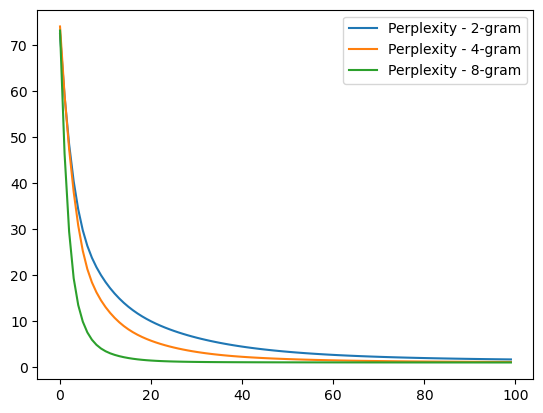

In [69]:
for (my_loss, model_name)in zip(my_loss_list,["2-gram","4-gram","8-gram"]):
    # Calculate perplexity using the loss
    perplexity = np.exp(my_loss)
    plt.plot(perplexity,label="Perplexity - {}".format(model_name))
    plt.legend()

# Exercises


### Exercise 1 - Source a collection of nursery rhymes and compile them into a single text variable.


In [72]:
nursery_rhymes = """
Little Miss Muffet
Sat on a tuffet,
Eating her curds and whey;
Along came a spider
Who sat down beside her
And frightened Miss Muffet away.

Twinkle, twinkle, little star,
How I wonder what you are!
Up above the world so high,
Like a diamond in the sky.

Baa, baa, black sheep,
Have you any wool?
Yes sir, yes sir,
Three bags full.

Jack and Jill went up the hill
To fetch a pail of water.
Jack fell down and broke his crown,
And Jill came tumbling after.

Hickory dickory dock,
The mouse ran up the clock.
The clock struck one,
The mouse ran down,
Hickory dickory dock.

Humpty Dumpty sat on a wall,
Humpty Dumpty had a great fall.
All the king's horses and all the king's men
Couldn't put Humpty together again.

Mary had a little lamb,
Its fleece was white as snow;
And everywhere that Mary went,
The lamb was sure to go.

Old MacDonald had a farm,
E-I-E-I-O,
And on his farm he had a cow,
E-I-E-I-O.

Itsy Bitsy Spider climbed up the waterspout.
Down came the rain and washed the spider out.
Out came the sun and dried up all the rain,
And the Itsy Bitsy Spider climbed up the spout again.

The wheels on the bus go round and round,
Round and round,
Round and round.
The wheels on the bus go round and round,
All through the town.

"""

### Exercise 2 - Preprocess the text data to tokenize and create n-grams.


In [73]:
N=2
tokens = preprocess(nursery_rhymes)  # Use the preprocess function provided in the code.
ngrams = list(nltk.ngrams(tokens, N))  # Where N is the size of the n-gram (2, 4, 8, etc.).

### Exercise 3 - Train an N-gram language model using the provided code structure.


In [74]:
model = NGramLanguageModeler(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.1)
loss_history = train(dataloader, model)

  2%|▏         | 2/100 [00:00<00:16,  6.02it/s]

Generated Song:


 gonna you gonna do gonna gonna gonna game never do gonna gonna you gonna do do game do gonna do gonna lie never you gonna down gonna gonna do gonna never gonna game gonna never you gonna gonna gonna never were gonna gonna you never you do gonna i gonna never do gonna never gonna gonna game never do do gonna you gonna gonna never never you gonna do you gonna you gonna lie each gonna gonna down gonna do gonna lie gonna never gonna you gonna gonna do gonna do gonna gonna down never never you gonna down gonna


 12%|█▏        | 12/100 [00:01<00:12,  6.95it/s]

Generated Song:


 you you you you you never you you you you never never you you you you you you you never you you never you never you you you you you you gonna you you never you gonna you you never you gonna you you never you you you you you you you you you never gonna you you you you gonna you you you you you you never never you never you you you you you you you you never gonna you you you gonna you never you you you you you never you you never you never you you


 22%|██▏       | 22/100 [00:03<00:11,  6.52it/s]

Generated Song:


 you you you you you i you you you you never never you you you you you you you never you you never you never you you you you you you i you you never you never i you never never gonna you you never you you you you you you you you you i gonna you you you you guy you you i you you you never i you never you you you let you you you you never gonna you you you gonna you never you you you you you never you you never you never i you


 32%|███▏      | 32/100 [00:04<00:10,  6.64it/s]

Generated Song:


 im you you you you i you guy you you never im you you you you im you you never you you i you never you you im you you you i you you guy you never i you never never gonna you you never you you im i you you you you you i gonna you you you you guy you you guy you guy you never i you im you you you let you you you you never gonna you you you gonna you never you you im you you guy you you im you never i you


 42%|████▏     | 42/100 [00:06<00:09,  6.38it/s]

Generated Song:


 im you you you guy i you guy you you never im you you you you im you you never guy you i you never you you im you you you i you you guy never never i you never never gonna you you never you you im i you you you guy you i gonna you you you you guy you you guy you guy you never i you im you you you let you you you you never guy you you you gonna you never dont you im you you guy you you im you never i you


 52%|█████▏    | 52/100 [00:07<00:07,  6.49it/s]

Generated Song:


 im you you you guy guy guy guy you you never im you you you you im you you never guy you i you never you you im you you you i you you guy never never i you never never gonna you you never you you im i you you you guy you i gonna you you you you guy you you guy you guy guy never i you im you you you let you im you you never guy you guy you im you never dont you im you you guy you you im you never i you


 62%|██████▏   | 62/100 [00:09<00:05,  6.50it/s]

Generated Song:


 im you you you guy guy guy guy you you never im you you you you im you you never guy guy i you never you you im you you you i guy you guy never never i you never never gonna you you never you you im i you you you guy you i gonna you you you you guy you you guy you guy guy never i you im it you you let you im you you never guy you guy you im you never dont you im you you guy guy you im you never i you


 72%|███████▏  | 72/100 [00:10<00:04,  6.36it/s]

Generated Song:


 im you you you guy guy guy guy you you never im you guy you you im you you never guy guy i you never you you im you you you i guy you guy never never i you never never gonna you you never you you im i you you you guy you i gonna you you you you guy you you guy you guy guy never i you im it you you let you im you you never guy you guy you im you never dont you im you you guy guy you im you guy i you


 82%|████████▏ | 82/100 [00:12<00:02,  7.12it/s]

Generated Song:


 im you you you guy guy guy guy you you never im you guy you you im you you never guy guy i you never you you im you you you i guy you guy never never i you never never gonna you you never you you im i you you you guy you i gonna you you you you guy you you guy you guy guy never i you im it you you let you im you you never guy you guy you im you never dont you im you you guy guy you im you guy i you


 92%|█████████▏| 92/100 [00:13<00:01,  7.05it/s]

Generated Song:


 im you you you guy guy guy guy you you never im you guy you you im you you never guy guy i you never you you im you you you i guy you guy never never i you never never gonna you you let you you im i guy you you guy you i gonna you you you you guy you you guy you guy guy never i you im it you you let you im you you never guy you guy you im you never dont you im you you guy guy you im you guy i you


100%|██████████| 100/100 [00:14<00:00,  6.70it/s]


### Exercise 4 - After training, use the model to generate a new nursery rhyme and then print it.


In [75]:
generated_rhyme = write_song(model)
print(generated_rhyme)

 im you you you guy guy guy guy you you never im you guy you you im you you never guy guy i you never you you im you you guy i guy you guy never never i you never never gonna you you let you you im i guy you you guy you i gonna you you you you guy you you guy you guy guy never i you im it you you let you im you you never guy you guy you im you never dont you im you you guy guy you im you guy i you


---


# Congratulations! You have completed the lab


## Authors


[Joseph Santarcangelo](https://www.linkedin.com/in/joseph-s-50398b136/) has a Ph.D. in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


### Contributor

[Roodra Kanwar](https://www.linkedin.com/in/roodrakanwar/) is completing his MS in CS specializing in big data from Simon Fraser University. He has previous experience working with machine learning and as a data engineer.


```{## Change log}


```{|Date (YYYY-MM-DD)|Version|Changed By|Change Description||-|-|-|-||2023-09-01|0.1|Joseph|Created Lab Template & Guided Project||2023-09-03|0.1|Joseph|Updated Guided Project|}


© Copyright IBM Corporation. All rights reserved.
